In [2]:
import pandas as pd
import glob
import os
import geopandas as gpd
from os.path import join

In [3]:
carpeta = "data/RSH 2016 - 2021/*.csv"
codigos_comunales = pd.read_csv(join("data", "codigos_comunales.csv"))
dict_mapas = {}
for ruta_archivo in glob.glob(carpeta):
    df = pd.read_csv(ruta_archivo)
    nombre_archivo = os.path.basename(ruta_archivo).split(".")[0]
    df.columns = [
    "codigo comuna",
    "hogares tramo 0 - 40",
    "hogares tramo 41 - 50",
    "hogares tramo 51 - 60",
    "hogares tramo 61 - 70",
    "hogares tramo 71 - 80",
    "hogares tramo 81 - 90",
    "hogares tramo 91 - 100",
    "total hogares"
]
    df = df.astype(int)
    df_final = pd.merge(df, codigos_comunales, how="right", on="codigo comuna")

    df_pobreza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 0 - 40"]]
    df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
    df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)

    df_riqueza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 71 - 80", "hogares tramo 81 - 90", "hogares tramo 91 - 100"]]
    df_riqueza["prc tramos altos"] = (df_final["hogares tramo 71 - 80"] + \
                                      df_final["hogares tramo 81 - 90"] + \
                                      df_final["hogares tramo 91 - 100"]) / df_final["total hogares"]
    df_riqueza.sort_values("prc tramos altos", inplace=True, ignore_index=True)

    mapa: gpd.GeoDataFrame = gpd.read_file(join("data", "r13.geojson"))
    mapa["codigo_comuna"] = mapa["codigo_comuna"].astype(int)
    mapa = mapa.dissolve("codigo_comuna")
    mapa = pd.merge(mapa, df_pobreza[["codigo comuna", "prc tramo 0 - 40"]], how="left", left_index=True, right_on="codigo comuna")
    mapa = pd.merge(mapa, df_riqueza[["codigo comuna", "prc tramos altos", "nombre comuna"]], how="left", on="codigo comuna")

    dict_mapas[nombre_archivo.split("_")[3]] = mapa

    

/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/287549918.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/287549918.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/287549918.py:26: SettingWithCopyWarning: 
A value is trying to be set on a cop

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2016')

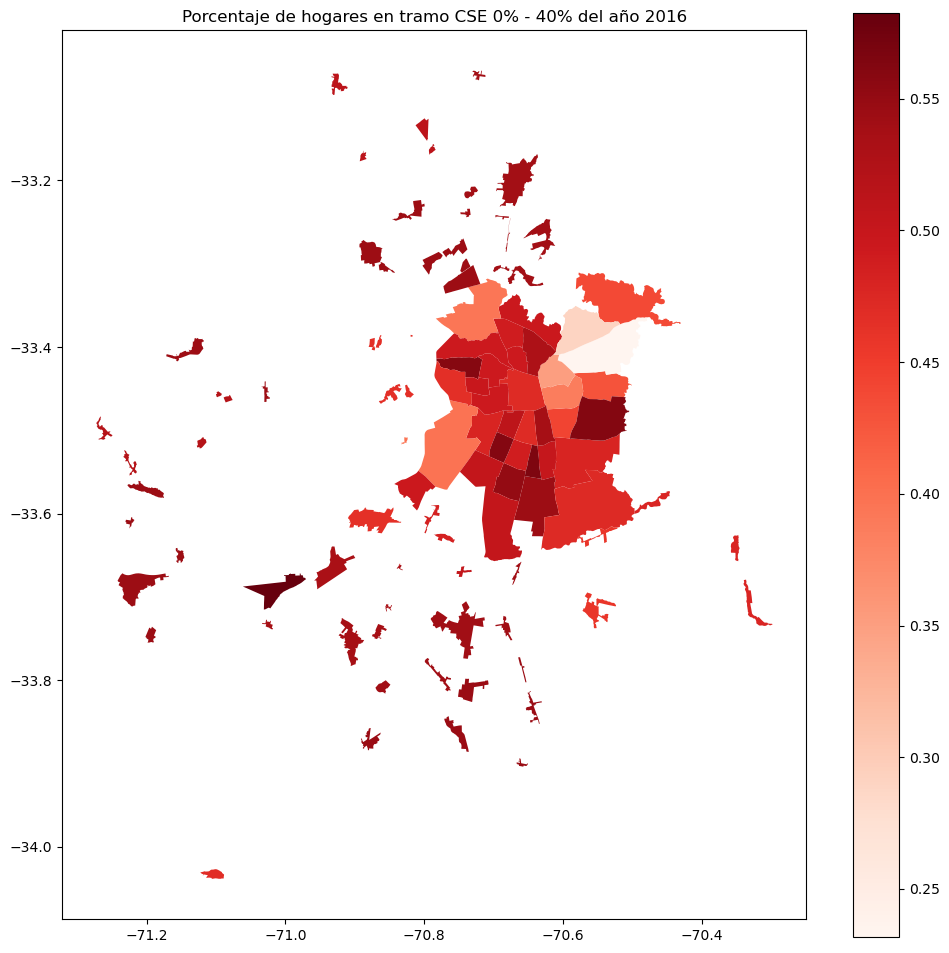

In [4]:
mapa = dict_mapas["201606"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2016")


Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2016')

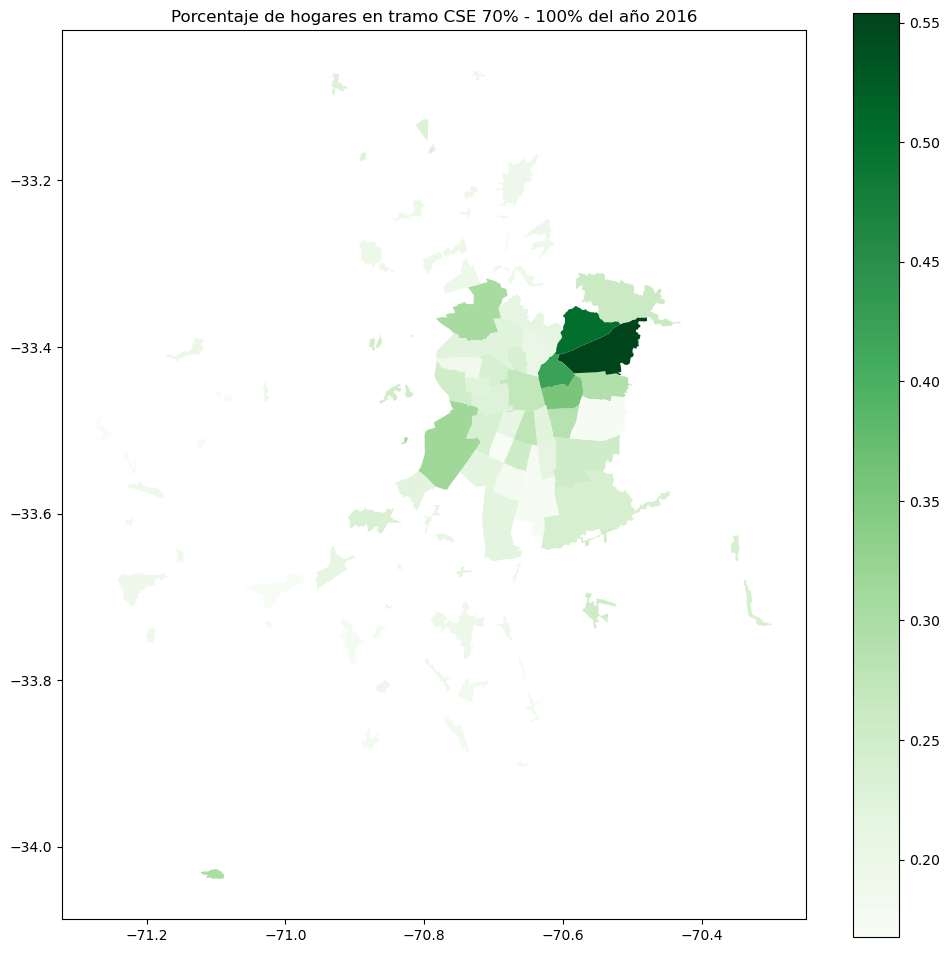

In [5]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2016")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2017')

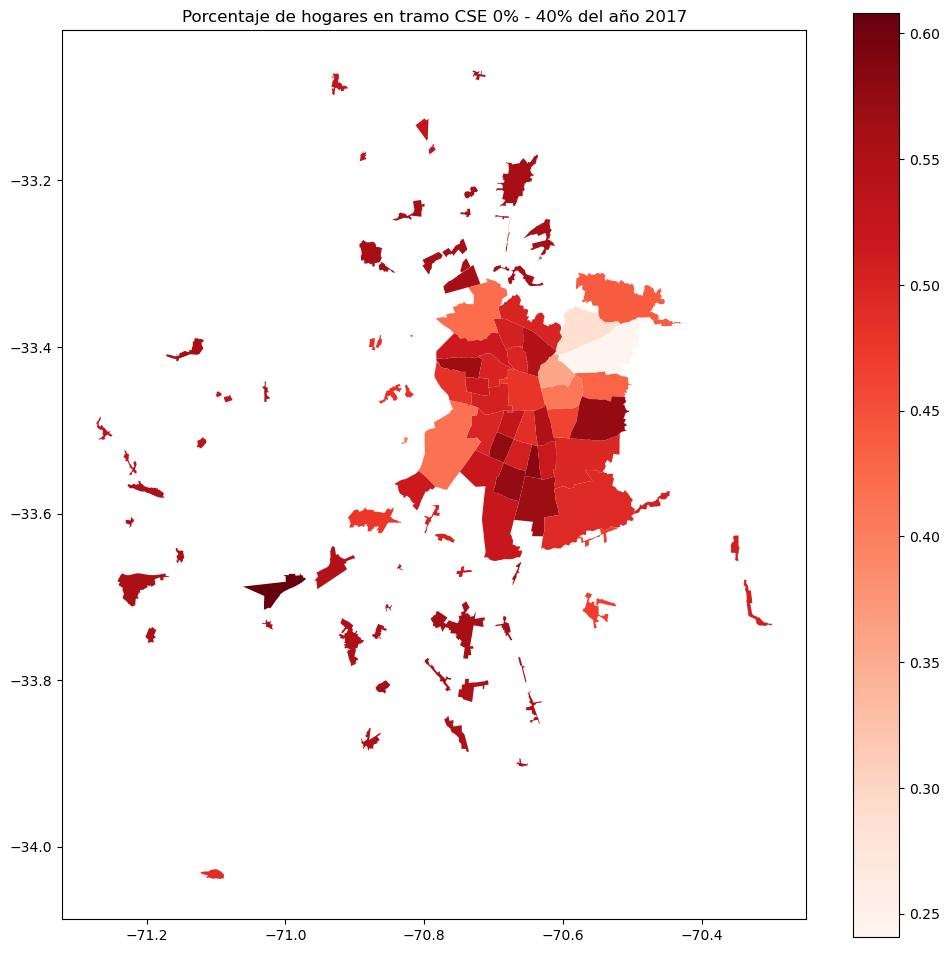

In [6]:
mapa = dict_mapas["201706"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2017")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2017')

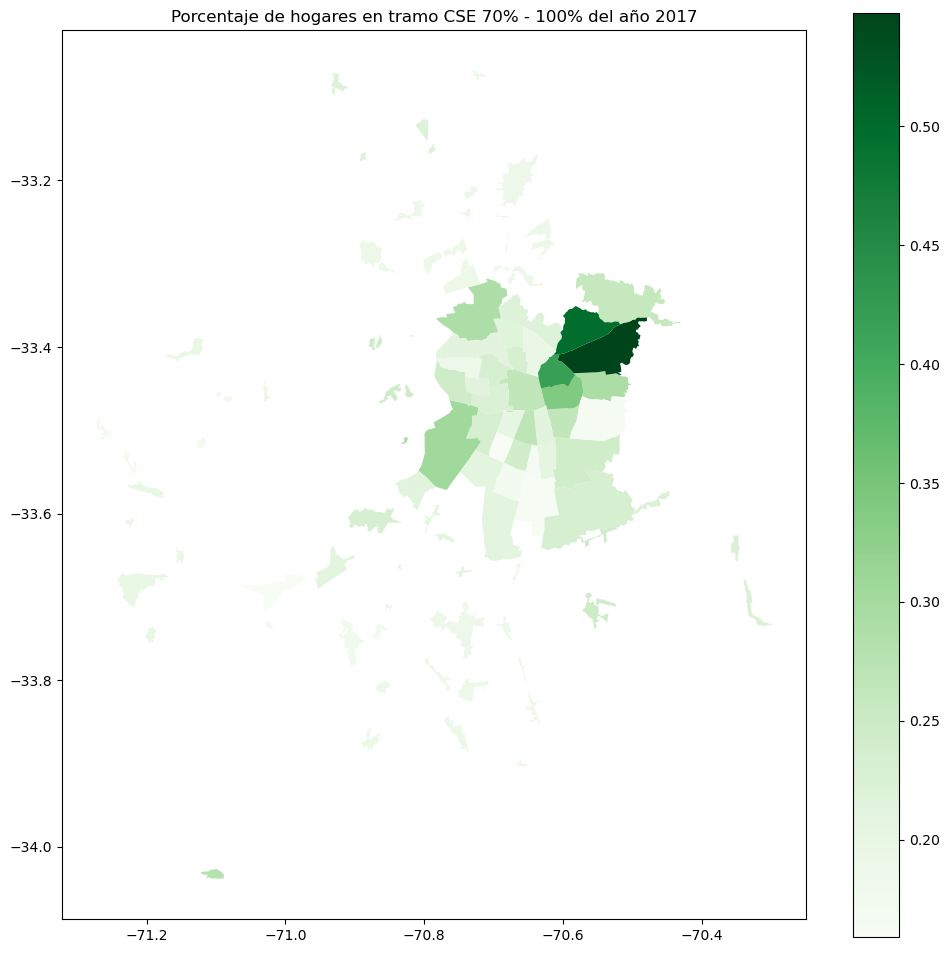

In [7]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2017")

In [8]:
dict_mapas

{'201706':                                              geometry    geocodigo  \
 0   POLYGON ((-70.64264 -33.43404, -70.63877 -33.4...  13101091001   
 1   POLYGON ((-70.72004 -33.51595, -70.71834 -33.5...  13102041003   
 2   POLYGON ((-70.72897 -33.43637, -70.73022 -33.4...  13103081001   
 3   POLYGON ((-70.66651 -33.39895, -70.66816 -33.3...  13104081001   
 4   POLYGON ((-70.66959 -33.58399, -70.67087 -33.5...  13105021001   
 5   POLYGON ((-70.70752 -33.48097, -70.70895 -33.4...  13106111003   
 6   POLYGON ((-70.60196 -33.38921, -70.60194 -33.3...  13107011007   
 7   POLYGON ((-70.66169 -33.42914, -70.66422 -33.4...  13108051001   
 8   POLYGON ((-70.64769 -33.51675, -70.64463 -33.5...  13109021001   
 9   POLYGON ((-70.61225 -33.55567, -70.61272 -33.5...  13110011004   
 10  POLYGON ((-70.63115 -33.55808, -70.63207 -33.5...  13111051002   
 11  POLYGON ((-70.64473 -33.62717, -70.64333 -33.6...  13112041002   
 12  POLYGON ((-70.53906 -33.46328, -70.54008 -33.4...  13113051001

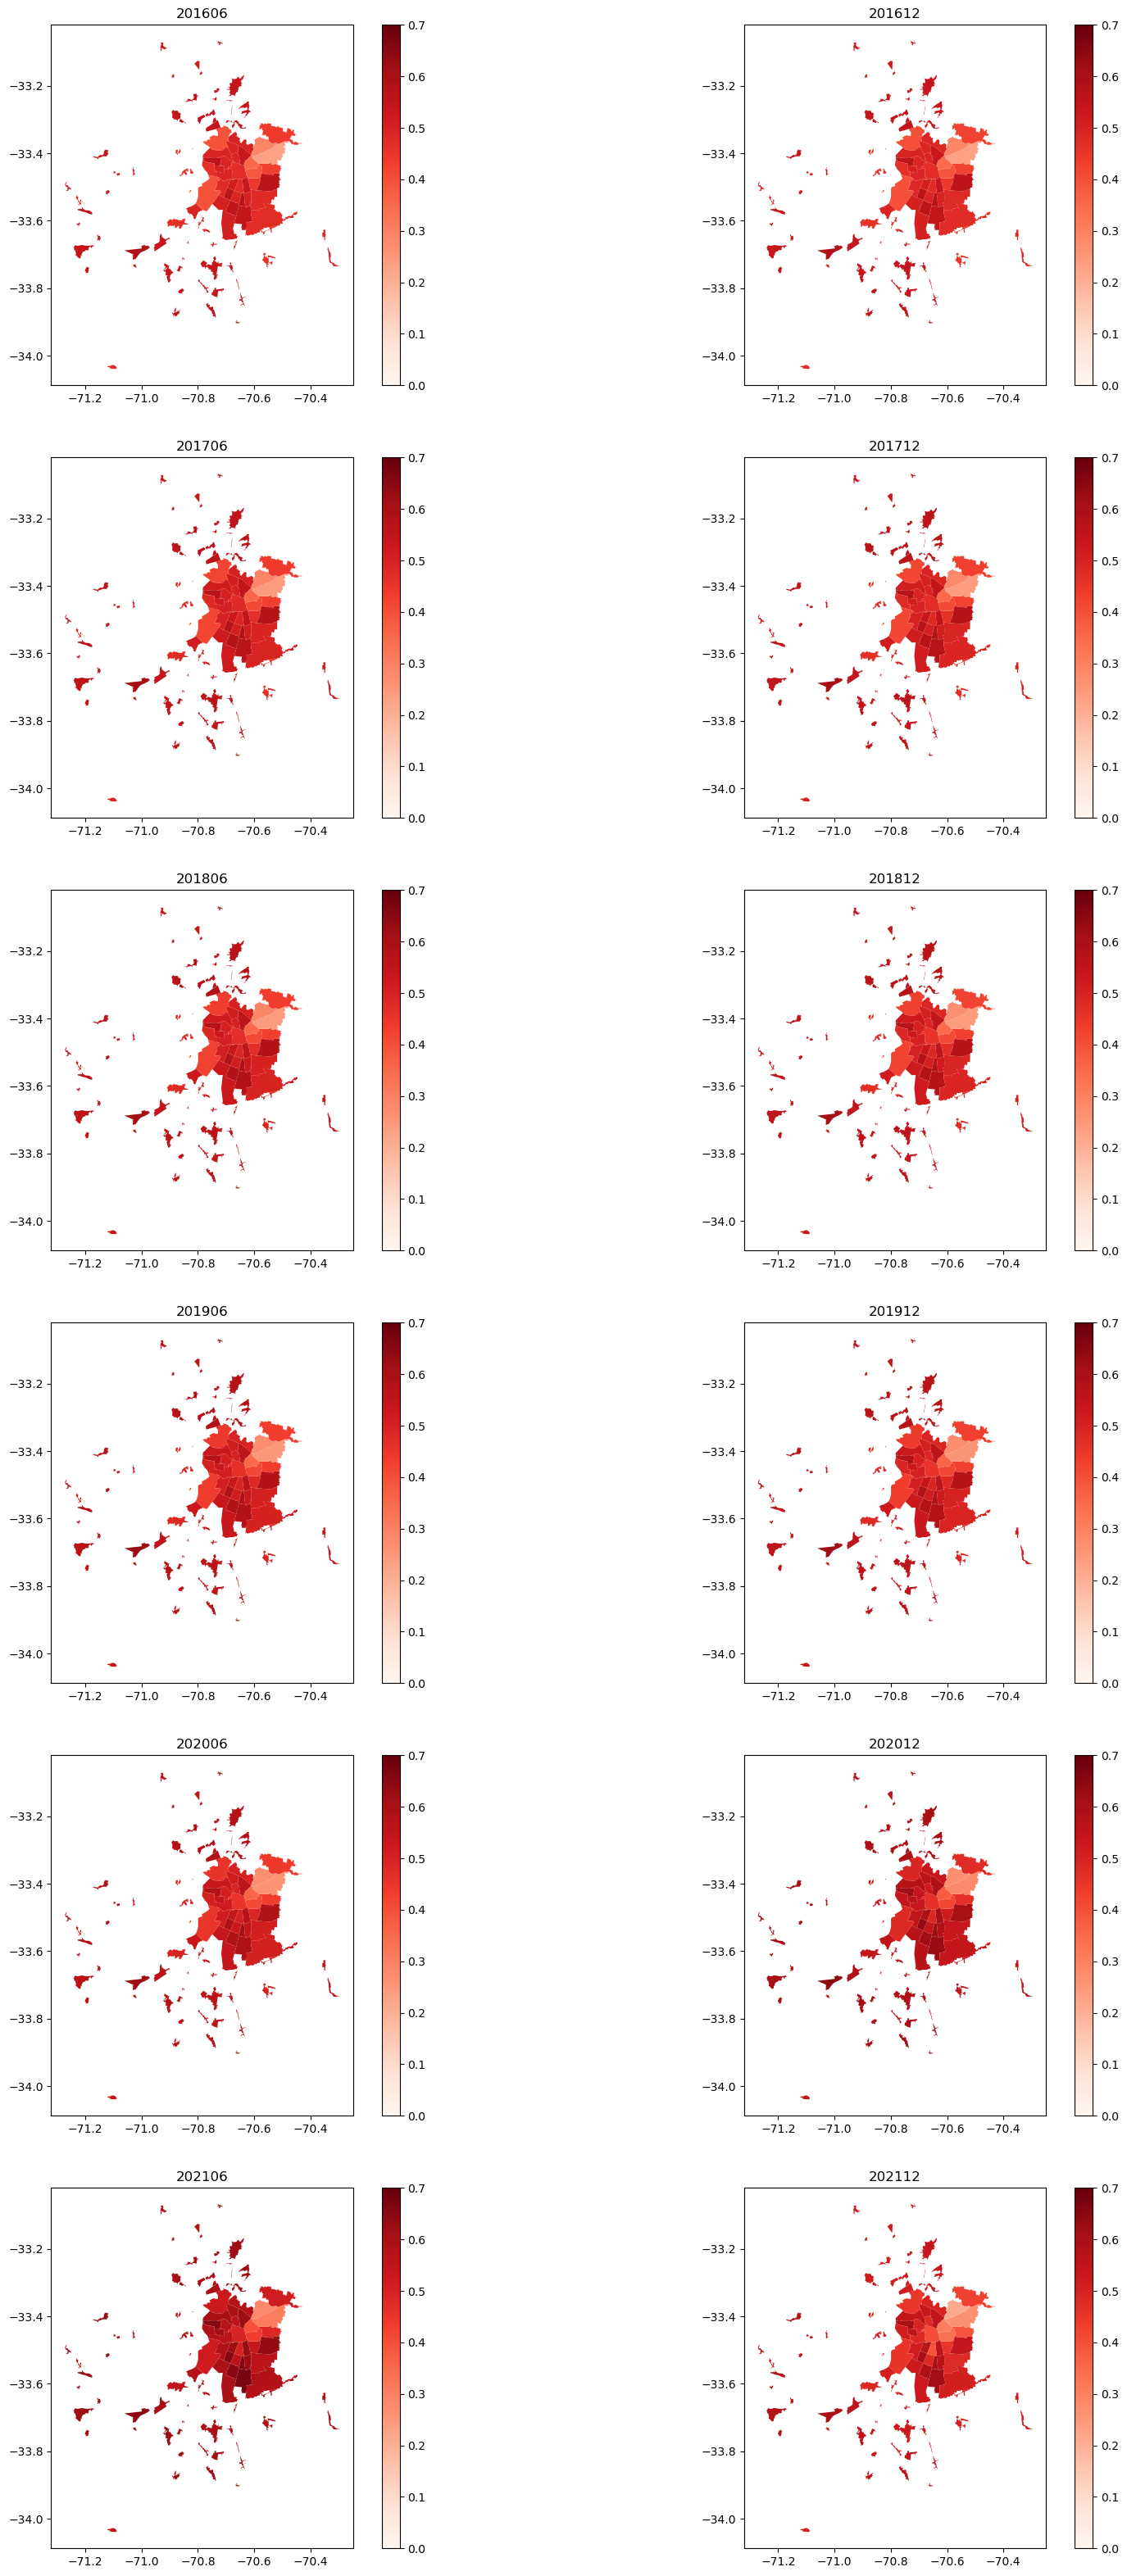

In [9]:
import matplotlib.pyplot as plt

keys_list = list(dict_mapas.keys())
keys_list.sort()

fig, axes = plt.subplots(6, 2)
fig.set_size_inches(20, 40)
i, j = 0, 0
for key in keys_list:
    dict_mapas[key].plot(
        column = "prc tramo 0 - 40",
        cmap = "Reds",
        legend = True,
        figsize = (12, 12),
        ax=axes[i][j],
        vmin = 0,
        vmax = 0.7
    )
    axes[i][j].set_title(key)
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [10]:
dict_mapas["201606"]

,geometry,geocodigo,codigo_provincia,codigo_region,codigo comuna,prc tramo 0 - 40,prc tramos altos,nombre comuna
0,"POLYGON ((-70.64264 -33.43404, -70.63877 -33.4...",13101091001,131,13,13101,0.470504,0.270752,Santiago
1,"POLYGON ((-70.72004 -33.51595, -70.71834 -33.5...",13102041003,131,13,13102,0.479563,0.238433,Cerrillos
2,"POLYGON ((-70.72897 -33.43637, -70.73022 -33.4...",13103081001,131,13,13103,0.559524,0.188139,Cerro Navia
3,"POLYGON ((-70.66651 -33.39895, -70.66816 -33.3...",13104081001,131,13,13104,0.490279,0.223667,Conchalí
4,"POLYGON ((-70.66959 -33.58399, -70.67087 -33.5...",13105021001,131,13,13105,0.550956,0.178532,El Bosque
5,"POLYGON ((-70.70752 -33.48097, -70.70895 -33.4...",13106111003,131,13,13106,0.492369,0.229293,Estación Central
6,"POLYGON ((-70.60196 -33.38921, -70.60194 -33.3...",13107011007,131,13,13107,0.495685,0.213025,Huechuraba
7,"POLYGON ((-70.66169 -33.42914, -70.66422 -33.4...",13108051001,131,13,13108,0.492267,0.238355,Independencia
8,"POLYGON ((-70.64769 -33.51675, -70.64463 -33.5...",13109021001,131,13,13109,0.489482,0.254981,La Cisterna
9,"POLYGON ((-70.61225 -33.55567, -70.61272 -33.5...",13110011004,131,13,13110,0.479420,0.251228,La Florida


In [11]:
df_sj = pd.DataFrame({"year": [], "prc tramo 0 - 40": []})
for key in keys_list:
    ano = float(key[0:4]) + float(key[4:]) / 12
    sj = dict_mapas[key][dict_mapas[key]["codigo comuna"] == 13129]
    df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
    df_sj = pd.concat((df_sj, df_provisorio), axis="index", ignore_index=True)

df_sj

/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/3017358433.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/3017358433.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_82226/3017358433.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/cw/q3kmrh

,year,prc tramo 0 - 40
0,2016.5,0.536189
1,2017.0,0.533027
2,2017.5,0.550023
3,2018.0,0.545904
4,2018.5,0.556388
5,2019.0,0.556031
6,2019.5,0.564600
7,2020.0,0.563255
8,2020.5,0.576718
9,2021.0,0.604832


In [12]:
import statsmodels.api as sm

y = df_sj["prc tramo 0 - 40"]
x = df_sj["year"]

X = sm.add_constant(x)

linear_sj = sm.OLS(y, X).fit()

beta_0, beta_1 = linear_sj.params
beta_0, beta_1

(-23.377964182208654, 0.01185719391759353)

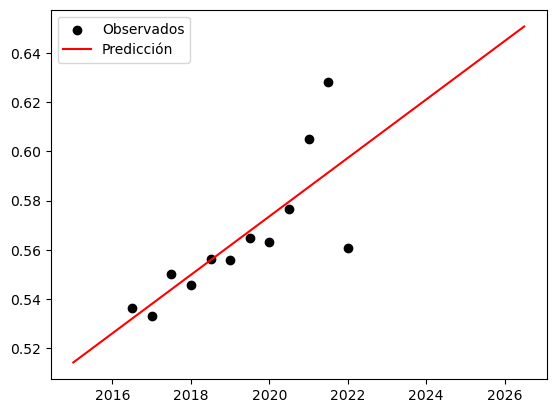

In [13]:
import numpy as np

x_ticks = np.arange(start=2015, stop=2027, step=0.5)
y_ticks = beta_0 + beta_1 * x_ticks

fig, ax = plt.subplots(1, 1)
ax.scatter(
    x = [float(key[0:4]) + float(key[4:]) / 12 for key in keys_list],
    y = df_sj["prc tramo 0 - 40"],
    label = "Observados",
    color = "black"
)
ax.plot(
    x_ticks,
    y_ticks,
    label = "Predicción",
    color = "red"
)
ax.legend()

In [ ]:
comunas = list(dict_mapas["201606"]["nombre comuna"])

def df_comuna(nombre_comuna):
    df = pd.DataFrame({"year": [], "prc tramo 0 - 40": []})
    for key in keys_list:
        ano = float(key[0:4]) + float(key[4:]) / 12
        com = dict_mapas[key][dict_mapas[key]["nombre comuna"] == nombre_comuna]
        df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(com["prc tramo 0 - 40"])]})
        df = pd.concat((df, df_provisorio), axis="index", ignore_index=True)
    return df

def linear_comuna(nombre_comuna):
    df_com = df_comuna(nombre_comuna)
    y = df_com["prc tramo 0 - 40"]
    x = df_com["year"]
    x = sm.add_constant(x)
    return sm.OLS(y, x).fit()

def cuadratica_comuna(nombre_comuna):
    df_com = df_comuna(nombre_comuna)
    y = df_com["prc tramo 0 - 40"]
    x = df_com["year"]
    x = sm.add_constant(x)
    x["year^2"] = x["year"]**2
    return sm.OLS(y, x).fit()

def plot_cuadratica_comuna(nombre_comuna, ax):
    df_com = df_comuna(nombre_comuna)
    cuadratica_com = cuadratica_comuna(nombre_comuna)
    beta_0, beta_1, beta_2 = cuadratica_com.params
    x_ticks = np.arange(start=2015, stop=2027, step=0.5);
    y_ticks = beta_0 + beta_1 * x_ticks + beta_2 * x_ticks**2;
    ax.set_title(nombre_comuna);
    ax.scatter(
        x = df_com["year"],
        y = df_com["prc tramo 0 - 40"],
        label = "Observados",
        color = "black"
    )
    ax.plot(
        x_ticks,
        y_ticks,
        label = "Predicción",
        color = "red"
    )
    ax.legend();
    #fig.savefig(f'imgs/{nombre_comuna}_cuadratica_tramo_40.png')

def plot_comuna(nombre_comuna, ax):
    df_com = df_comuna(nombre_comuna)
    linear_com = linear_comuna(nombre_comuna)
    beta_0, beta_1 = linear_com.params
    x_ticks = np.arange(start=2015, stop=2027, step=0.5);
    y_ticks = beta_0 + beta_1 * x_ticks;
    ax.set_title(nombre_comuna);
    ax.scatter(
        x = df_com["year"],
        y = df_com["prc tramo 0 - 40"]**2 + df_com["prc tramo 0 - 40"],
        label = "Observados",
        color = "black"
    )
    ax.plot(
        x_ticks,
        y_ticks,
        label = "Predicción",
        color = "red"
    )
    ax.legend();
    #fig.savefig(f'imgs/{nombre_comuna}_lineal_tramo_40.png')

len(comunas);

In [ ]:
fig, axes = plt.subplots(26, 2)
fig.set_size_inches(16, 160)

i, j = 0, 0
for comuna in comunas:
    print(comuna);
    plot_cuadratica_comuna(comuna, axes[i][j])
    fig.savefig(f'imgs/{comuna}_cuadratica_tramo_40.png')
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1